# Direct Methods for Linear Systems

## Imports

In [12]:
import numpy as np
import scipy.linalg as la

## Solving Linear Systems (Library) (Exam)

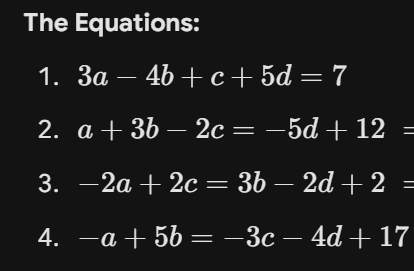

In [13]:
A = np.array(
    [
        [3, -4, 1, 5],
        [1, 3, -2, 5],
        [-2, -3, 2, 2],
        [-1, 5, 3, 4],
    ], dtype=float
)

b = np.array([7, 12, 2, 17], dtype=float)

In [14]:
# Using NumPy

solution_np = np.linalg.solve(A, b.copy())
x1, x2, x3, x4 = solution_np
print(f"x1 = {x1:.4f}, x2 = {x2:.4f}, x3 = {x3:.4f}, x4 = {x4:.4f}")

x1 = 0.2255, x2 = 1.2123, x3 = 1.0117, x4 = 2.0322


In [15]:
# Using SciPy

solution_sp = la.solve(A, b.copy())
x1, x2, x3, x4 = solution_sp
print(f"x1 = {x1:.4f}, x2 = {x2:.4f}, x3 = {x3:.4f}, x4 = {x4:.4f}")

x1 = 0.2255, x2 = 1.2123, x3 = 1.0117, x4 = 2.0322


In [16]:
# Sanity Check
# Ax = b

Ax = A @ solution_sp
print(f'Checks: {np.allclose(Ax, b)}')

Checks: True


## Random Coefficient (Exam)

"For extra credit, show the solution for a problem with the coefficients generated randomly."

In [33]:
A_random = np.random.uniform(1, 5, (4, 4))
b_random = np.random.randint(1, 20, 4)

x_random = np.linalg.solve(A_random, b_random)
x1, x2, x3, x4 = x_random
print(f"x1 = {x1:.4f}, x2 = {x2:.4f}, x3 = {x3:.4f}, x4 = {x4:.4f}")

x1 = -0.4372, x2 = -3.3790, x3 = 5.0819, x4 = 4.4705


## Matrix Algebra Laws (Exam)

Verify $A(B+C) = AB + AC$ using random matrices.

In [45]:
N = 4

A = np.random.randint(1, 7, (N, N))
B = np.random.randint(3, 9, (N, N))
C = np.random.randint(0, 10, (N, N))

LHS = np.dot(A, np.add(B, C))
RHS = (A @ B) + (A @ C)

print(f'Checks: {np.allclose(LHS, RHS)}')

Checks: True


## Naive Gaussian Elimination (Forward Elimination)

We want to turn matrix $A$ into an Upper Triangular Matrix ($U$) by eliminating values below the diagonal.$$\begin{bmatrix} 
\mathbf{3} & -4 & 1 \\ 
1 & 3 & -2 \\ 
-2 & -3 & 2 
\end{bmatrix} 
\xrightarrow{\text{Eliminate col 1}} 
\begin{bmatrix} 
3 & -4 & 1 \\ 
0 & 4.33 & -2.33 \\ 
0 & -5.66 & 2.66 
\end{bmatrix}$$

In [62]:
def naive_gaussian(A, b):
    b_column = b.reshape(-1, 1)
    A_augmented = np.concatenate([A, b_column], axis=1).astype(float)
    n = A_augmented.shape[0]

    for k in range(n - 1):
        if A_augmented[k, k] == 0:
            continue

        for i in range(k + 1, n):
            factor = A_augmented[i, k] / A_augmented[k, k]

            A_augmented[i, k:] = A_augmented[i, k:] - (factor * A_augmented[k, k:])
            
    return A_augmented

In [66]:
A_random = np.random.uniform(1, 10, (4, 4))
b_random = np.random.uniform(0, 10, 4)
print(naive_gaussian(A_random, b_random))

[[ 7.15154827  6.32333537  5.45933303  7.65928744  8.50048333]
 [ 0.          7.31202613  4.59669056  8.37496588  1.4636017 ]
 [ 0.          0.         -3.32577309 -5.15358729  4.8390449 ]
 [ 0.          0.          0.         -3.52622836 -0.20196972]]
